## Carga de librerías

In [105]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y entendimiento de los datos

In [106]:
ruta = 'data/202220_Laboratorio_3_data_university_admission_train.csv'
df = pd.read_csv(ruta)
print("Número de filas: ", df.shape[0])
print("Número de columnas: ", df.shape[1])
df.sample(5)

Número de filas:  1569
Número de columnas:  10


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
134,134,119,296,99,2,3.00,3.5,7.28,0,47.0
442,442,465,298,72,2,0.59,3.0,7.21,0,45.0
953,953,463,265,101,4,2.79,3.0,8.25,0,62.0
20,20,83,320,110,5,5.00,4.5,9.22,1,92.0
531,531,65,285,101,3,3.00,3.5,8.70,0,52.0


In [107]:
print("Columnas y sus tipos de datos: \n")
print(df.info())

Columnas y sus tipos de datos: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1569 non-null   int64  
 1   Serial No.         1569 non-null   int64  
 2   GRE Score          1569 non-null   int64  
 3   TOEFL Score        1569 non-null   int64  
 4   University Rating  1569 non-null   int64  
 5   SOP                1569 non-null   float64
 6   LOR                1569 non-null   float64
 7   CGPA               1569 non-null   float64
 8   Research           1569 non-null   int64  
 9   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 122.7 KB
None


In [108]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,784.000000,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,453.075601,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,0.000000,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,392.000000,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,784.000000,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,1176.000000,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,1568.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


### Completitud

In [109]:
# Ver datos núlos
print("\nNúmero de filas con valores nulos: ", df.isnull().any(axis=1).sum())
print("Número de columnas con valores nulos: ", df.isnull().any().sum())
print("Lista de columnas con valores núlos y sus tipos: \n", df.isnull().any()[df.isnull().any() == True])

# Porcentaje de completitud
print(f"\nPorcentaje de completitud de las columnas: {(1-(df.isnull().any(axis=1).sum()/df.shape[0]))*100:.2f}%")


Número de filas con valores nulos:  65
Número de columnas con valores nulos:  1
Lista de columnas con valores núlos y sus tipos: 
 Admission Points    True
dtype: bool

Porcentaje de completitud de las columnas: 95.86%


### Duplicidad

In [110]:
# Ver duplicidad de datos
print("\nNúmero de filas duplicadas: ", df.duplicated().sum())
print("Número de filas con indice duplicado: ", df['Unnamed: 0'].duplicated().sum())
print("Número de filas con mismo número serial: ", df['Serial No.'].duplicated().sum())


Número de filas duplicadas:  0
Número de filas con indice duplicado:  0
Número de filas con mismo número serial:  1078


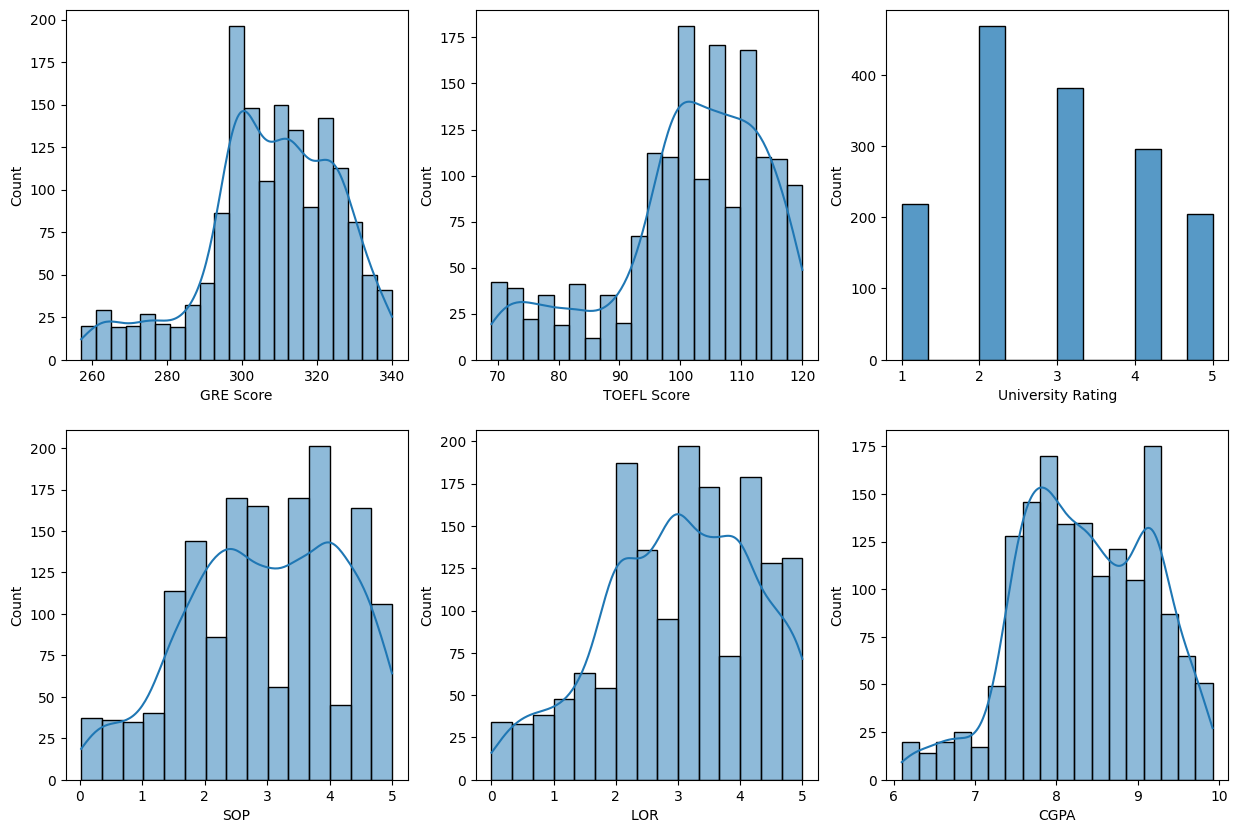

In [111]:
# Visualización de distribuciones de las columnas con sns
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['GRE Score'], ax=ax[0, 0], kde=True)
sns.histplot(df['TOEFL Score'], ax=ax[0, 1], kde=True)
sns.histplot(df['University Rating'], ax=ax[0, 2])
sns.histplot(df['SOP'], ax=ax[1, 0], kde=True)
sns.histplot(df['LOR '], ax=ax[1, 1], kde=True)
sns.histplot(df['CGPA'], ax=ax[1, 2], kde=True)
plt.show()

## Procesamiento y limpieza de los datos

In [112]:
# En primer lugar se elimina la columna Unnamed: 0, ya que no aporta información relevante (es un índice)
df.drop('Unnamed: 0', axis=1, inplace=True)

### Serial No.

In [113]:
# Se observa la cantidad de valores únicos en la columna 'Serial No.'
print("Número de valores únicos en la columna 'Serial No.': ", df['Serial No.'].nunique())

Número de valores únicos en la columna 'Serial No.':  491


In [114]:
# Se elimina la columna 'Serial No.' ya que no aporta información relevante
df.drop('Serial No.', axis=1, inplace=True)

### Variable objetivo: Admission Points

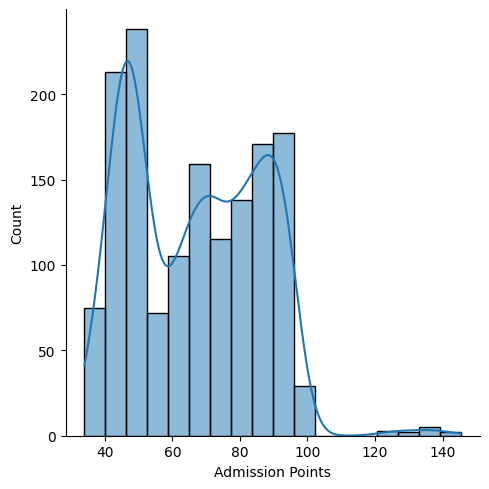

In [115]:
# Se eliminan las filas con variable nulo en la columna 'Admission Points':
df.dropna(subset=['Admission Points'], inplace=True)

# Se observa la distribución de la variable 'Admission Points'
sns.displot(df['Admission Points'], kde=True)
plt.show()

Número de filas:  1492


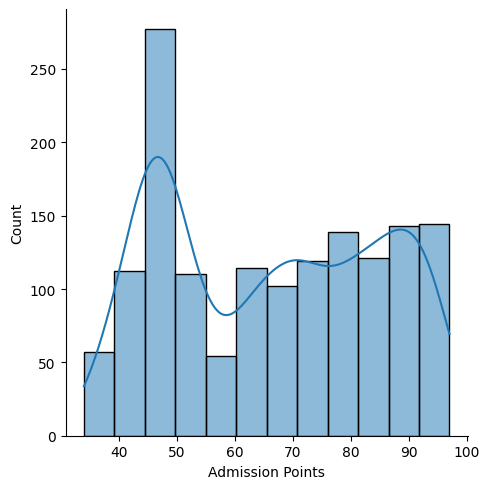

In [116]:
# Se eliminan los valores atípicos de la variable 'Admission Points'
df = df[df['Admission Points'] < 105]

# Se imprime el número de filas 
print("Número de filas: ", df.shape[0])

# Se observa la distribución de la variable 'Admission Points'
sns.displot(df['Admission Points'], kde=True)
plt.show()


### Busqueda de relaciones entre variables

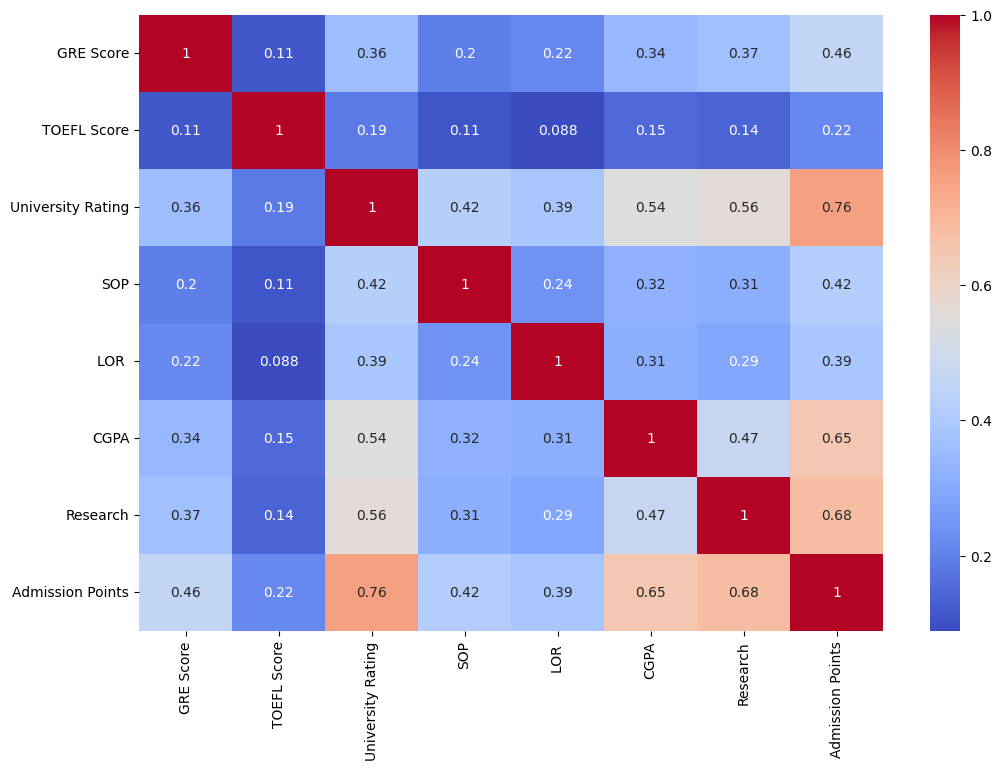

In [140]:
# Se contrasta con una matriz de correlaciones
f = plt.figure(figsize=(12, 8))
# Se agregan los valores en la matriz de correlaciones con valores de correlación negativos aceptados
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

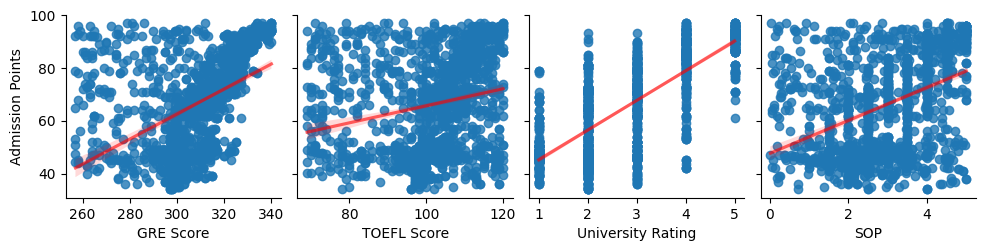

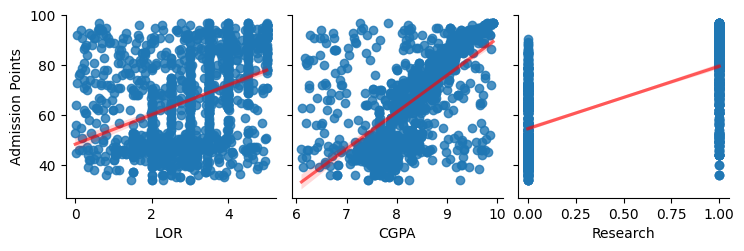

In [136]:
# Se crean diagramas de dispersión entre todas las columnas menos 'Admission Points' y la columna 'Admission Points' con sns.pairplot
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP'], y_vars=['Admission Points'], kind='reg', plot_kws={'line_kws':{'color':'red', 'alpha':0.6}})
plt.show()
sns.pairplot(df, x_vars=['LOR ', 'CGPA', 'Research'], y_vars=['Admission Points'], kind='reg', plot_kws={'line_kws':{'color':'red', 'alpha':0.6}})
plt.show()

## Creación datos procesados


In [119]:
from pathlib import Path

try:
    filepath = Path('data/processed_data.csv')
    df.to_csv(filepath, index=False)
    print("Archivo guardado exitosamente")
except:
    print("Error al guardar el archivo")

Archivo guardado exitosamente
